# Business Case - Domaine des Croix

Le client, le Domaine des Croix, cherche à se lancer sur le marché américain . Il souhaite donc **définir le prix** de ses bouteilles de vin **pour être compétitif sur le marché américain**. Il a récupéré un jeu de données de 130k bouteilles de vin, avec les cépages, les pays et région de production, les millésimes (c'est-à-dire les années de production), ainsi que des notes ("points") et descriptifs d'oenologues (les spécialistes du vin), et le prix moyen en dollars de toutes ces bouteilles sur le marché américain.

**L'objectif sera de faire une présentation de l'analyse du marché, et du prix que vous conseillez de fixer pour les vins du client.** Le client n'est pas data analyst, mais souhaiterait comprendre la démarche. Il faudra donc s'attacher à expliquer comment les prix ont été fixés, sans rentrer dans un trop grand niveau technique, autrement dit : vulgariser.




## Jeux de données
- Dataset des 130k vins : https://github.com/WildCodeSchool/wilddata/raw/main/wine.zip
- Dataset de la bouteille de vin que le client aimerait proposer sur le marché américain : https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/domaine_des_croix.csv


## Livrables attendus
**Compétence C4.6, Compétence C4.1** Le client souhaite une présentation (et non pas du code)
La présentation contiendra a minima ces éléments :
- Rappel du contexte et de la problématique
- Analyse exploratoire des données
- Méthodologie, outils et langages utilisés  **Compétence C2.2**
- Présentation de la partie technique et du code créé, si code il y a, pour cette analyse
- Votre tableau de bord contient des graphiques. **Compétence C4.2**
- Votre tableau de bord contient au moins une visualisation de données interactive. **Compétence C4.3**
- Votre tableau de bord contient au moins une carte représentant des informations géographiques. **Compétence C4.4**
- Votre tableau de bord contient au moins un tableau croisé. **Compétence C4.5**
- L'ensemble des graphiques et visuels doivent être lisible par tous (prise en compte des personne en situation de handicap visuel). **Compétence C4.7**
- Réponse à la question métier : proposition de prix ou de fourchette de prix au client pour être correctement positionné face à la concurrence sur le marché américain

Effectuez tout d'abord la trame ci-dessous. Puis, si vous avez des bonnes idées à proposer au client, elles sont évidemment les bienvenues.



## Préparation des données et exploration des données

## Analyse du marché
Le Domaine des Croix souhaiterait une analyse descriptive du marché du vin. Vous allez donc réaliser un ensemble de dataviz, avec l'outil de votre choix (Seaborn, Plotly, Excel, PowerBI, Tableau, etc...). Vous pouvez par exemple intégrer dans votre tableau de bord:
- la répartition du nombre de vins par pays
- les pays qui ont les meilleures notes
- les moyennes de notes par cépage
- la répartition par décile
- etc...



## Analyse comparative

L'objectif ici sera de comparer chacun des vins du client par rapport à ses concurrents sur le marché. Par exemple, comparer les tarifs pratiqués pour les vins français, puis de plus en plus précisément, les vins de Bourgogne puisque notre client est en Bourgogne, puis les Pinot Noir bourguignons de la même année.
N'hésitez pas à être original dans la présentation et les dataviz utilisées.

## Proposition de valeur

Avec le tableau de bord que vous lui avez fourni, le client a une idée précise de ses concurrents. Faites lui une proposition de prix en fonction de sa volonté de positionnement (par exemple : "si vous souhaitez vous positionner sur le haut de gamme, les 25% les plus chers de vos concurrents sont à ce tarif, nous vous conseillons donc de vous aligner sur ce prix").

## Qualité esthétique du tableau de bord

Essayez de garder un oeil critique et visuel sur votre tableau de bord. La forme compte autant que le fond pour le client qui n'est pas data analyst. Pensez donc à "vendre" votre analyse. Par exemple, avec des couleurs s'inspirant du milieu vinicole, des dataviz originales, etc...

# Chargement des librairies et données

In [348]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
!pip install category_encoders
from category_encoders import TargetEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [349]:
link = "https://github.com/WildCodeSchool/wilddata/raw/main/wine.zip"
df_wine_market = pd.read_csv(link)

df_wine_market.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2019 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [350]:
link2 = "https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/domaine_des_croix.csv"
df_domain = pd.read_csv(link2)

df_domain.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,France,Firm and solid with great swathes of black fru...,NaN,94,NaN,Burgundy,Corton Grèves,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Corton Grèves,Pinot Noir,Domaine des Croix


# 1. Exploration, nettoyage et harmonisation des données

## 1.1 Détecter les valeurs manquantes

In [351]:
print(df_wine_market.shape, df_domain.shape)

(129957, 13) (1, 13)


In [352]:
df_wine_market.isnull().sum()

,0
country,63
description,0
designation,37460
points,0
price,8993
province,63
region_1,21247
region_2,79446
taster_name,26244
taster_twitter_handle,31213


In [353]:
df_domain.isnull().sum()

,0
country,0
description,0
designation,1
points,0
price,1
province,0
region_1,0
region_2,1
taster_name,0
taster_twitter_handle,0


In [354]:
df_wine_market['price'].fillna(df_wine_market['price'].median(), inplace=True)

In [355]:
# on remplace les valeurs manquantes par des cellules vides
for col in ['region_1', 'region_2', 'taster_name', 'province', 'country']:
  df_wine_market[col].fillna('', inplace=True)

## 1.2 Vérifier le type de données (modification si nécessaire)

In [356]:
df_wine_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129957 entries, 0 to 129956
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129957 non-null  object 
 1   description            129957 non-null  object 
 2   designation            92497 non-null   object 
 3   points                 129957 non-null  int64  
 4   price                  129957 non-null  float64
 5   province               129957 non-null  object 
 6   region_1               129957 non-null  object 
 7   region_2               129957 non-null  object 
 8   taster_name            129957 non-null  object 
 9   taster_twitter_handle  98744 non-null   object 
 10  title                  129957 non-null  object 
 11  variety                129956 non-null  object 
 12  winery                 129957 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


#### Modifier le type de la variable "price"

In [357]:
df_wine_market['price'] = pd.to_numeric(df_wine_market['price'], errors='coerce')
df_wine_market['price'].dtype

dtype('float64')

#### Remplacer les valeurs manquantes dans la colonne "price" par la médiane

In [358]:
# description statistiques des valeurs numériques
df_wine_market.describe()

,points,price
count,129957.000000,129957.000000
mean,88.446655,35.879383
std,3.039481,31.702654
min,80.000000,2.000000
25%,86.000000,21.000000
50%,88.000000,29.000000
75%,91.000000,41.000000
max,100.000000,1902.000000


## 1.3 Création de nouvelles variables nécessaires à l'analyse (millésime, classes de prix, classes de points)

#### Ajout variable "millesime"

In [359]:
df_domain['millesime'] = df_domain['title'].str.extract(r'(?!\()\b(\d{4}){1}')
df_domain['millesime'].unique()

array(['2016'], dtype=object)

In [360]:
# extraction du millésime de la colonne "title"
df_wine_market['millesime'] = df_wine_market['title'].str.extract(r'(?!\()\b(\d{4}){1}')
df_wine_market['millesime'].unique()

array(['2019', '2017', '2018', '2016', '2013', '2015', '2014', '2020',
       '2021', nan, '2022', '2010', '2009', '2012', '2007', '2011',
       '2008', '1889', '2006', '2005', '1997', '2003', '2002', '1879',
       '2023', '2001', '1874', '1639', '1870', '1900', '1494', '2004',
       '7202', '1854', '2000', '1998', '1842', '1931', '1914', '1877',
       '1982', '1966', '1850', '1872', '1858', '1989', '1969', '1996',
       '1994', '1829', '1862', '1852', '1002', '1986', '1993', '1995',
       '1999', '1971', '1884', '1937', '1505', '1823', '1979', '1984',
       '1967', '1970', '1949', '1965', '1072', '1991', '1929', '1906',
       '1849', '1988', '1992', '1754', '1791', '1609', '1623', '1921',
       '1959', '1968', '1990', '1963', '1847', '1954', '1152', '1943',
       '1980', '3002', '1936', '1947'], dtype=object)

In [361]:
# on ne conservera que les millésime supérieur à 1800 et inférieur ou égal à 2023
wine_data = df_wine_market[(df_wine_market['millesime'] >= '1800') & (df_wine_market['millesime'] <= '2023')]
wine_data['millesime'].unique()

array(['2019', '2017', '2018', '2016', '2013', '2015', '2014', '2020',
       '2021', '2022', '2010', '2009', '2012', '2007', '2011', '2008',
       '1889', '2006', '2005', '1997', '2003', '2002', '1879', '2023',
       '2001', '1874', '1870', '1900', '2004', '1854', '2000', '1998',
       '1842', '1931', '1914', '1877', '1982', '1966', '1850', '1872',
       '1858', '1989', '1969', '1996', '1994', '1829', '1862', '1852',
       '1986', '1993', '1995', '1999', '1971', '1884', '1937', '1823',
       '1979', '1984', '1967', '1970', '1949', '1965', '1991', '1929',
       '1906', '1849', '1988', '1992', '1921', '1959', '1968', '1990',
       '1963', '1847', '1954', '1943', '1980', '1936', '1947'],
      dtype=object)

#### Ajout classe de points

In [362]:
def categorie_points(x):
    if x <= 80:
        return '0 - 80%'
    elif x > 81 and x <= 84:
        return '81 - 84%'
    elif x > 85 and x <= 89:
        return '85 - 89%'
    elif x > 90 and x <= 95:
        return '90 - 95%'
    else:
        return '96 - 100%'

wine_data['points_class'] = wine_data['points'].apply(categorie_points)
wine_data['points_class'].value_counts()

,count
points_class,
85 - 89%,56541
90 - 95%,32125
96 - 100%,25550
81 - 84%,10733
0 - 80%,366


#### Ajout classe de prix

In [363]:
def categorie_prix(prix):
    if prix < 20.0:
        return '1 - Moins de 20 $'
    elif prix >= 20.0 and prix <= 50.0:
        return '2 - 20 à 50 $'
    elif prix > 50.0 and prix <= 100.0:
        return '3 - 51 à 100 $'
    elif prix > 100.0 and prix <= 200.0:
        return '4 - 101 à 200 $'
    elif prix > 200.0 and prix <= 500.0:
        return '5 - 201 à 500 $'
    elif prix > 500.0 and prix <= 1000.0:
        return '6 - 501 à 1000 $'
    else:
        return '7 - 1000 $ et plus'

wine_data['price_class'] = wine_data['price'].apply(categorie_prix)
wine_data['price_class'].value_counts()

,count
price_class,
2 - 20 à 50 $,82660
1 - Moins de 20 $,24505
3 - 51 à 100 $,15485
4 - 101 à 200 $,2188
5 - 201 à 500 $,423
6 - 501 à 1000 $,45
7 - 1000 $ et plus,9


In [364]:
# importation de la base nettoyée
df_wine_market.to_csv("wine_data_market.csv")

# Exploration du marché - Visualisations des données globales
### Nombre de vins par variété

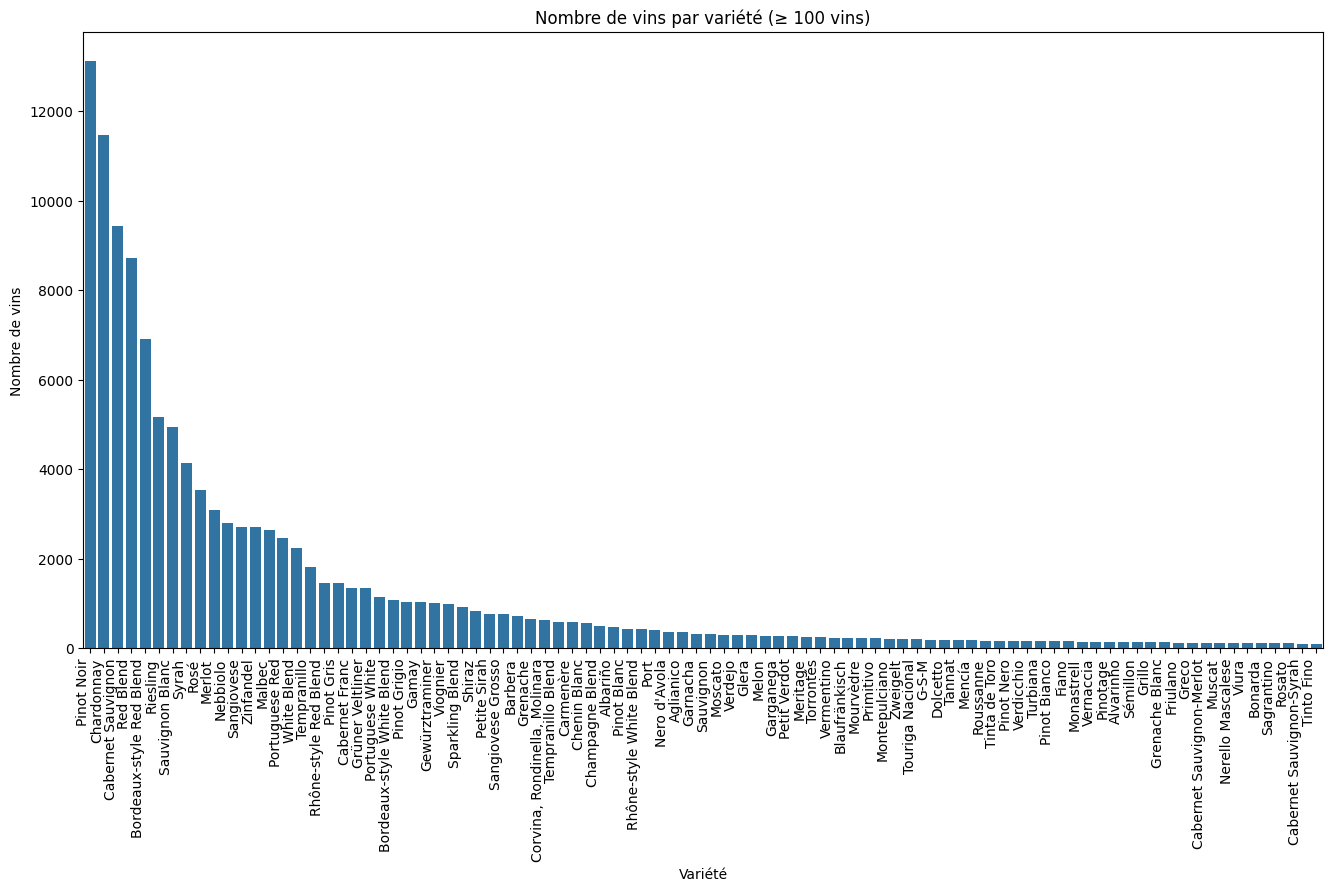

In [365]:
nbr_wine = (wine_data.groupby('variety').size().reset_index(name='count').sort_values(by='count', ascending=False))
nbr_wine_filtered = nbr_wine[nbr_wine['count'] >= 100]

plt.figure(figsize=(16, 8))
sns.barplot(data=nbr_wine_filtered, x='variety', y='count', order=nbr_wine_filtered['variety'])
plt.xlabel("Variété")
plt.ylabel("Nombre de vins")
plt.xticks(rotation=90, ha='right')
plt.title("Nombre de vins par variété (≥ 100 vins)")
plt.show();

### Nombre de vins par millésime

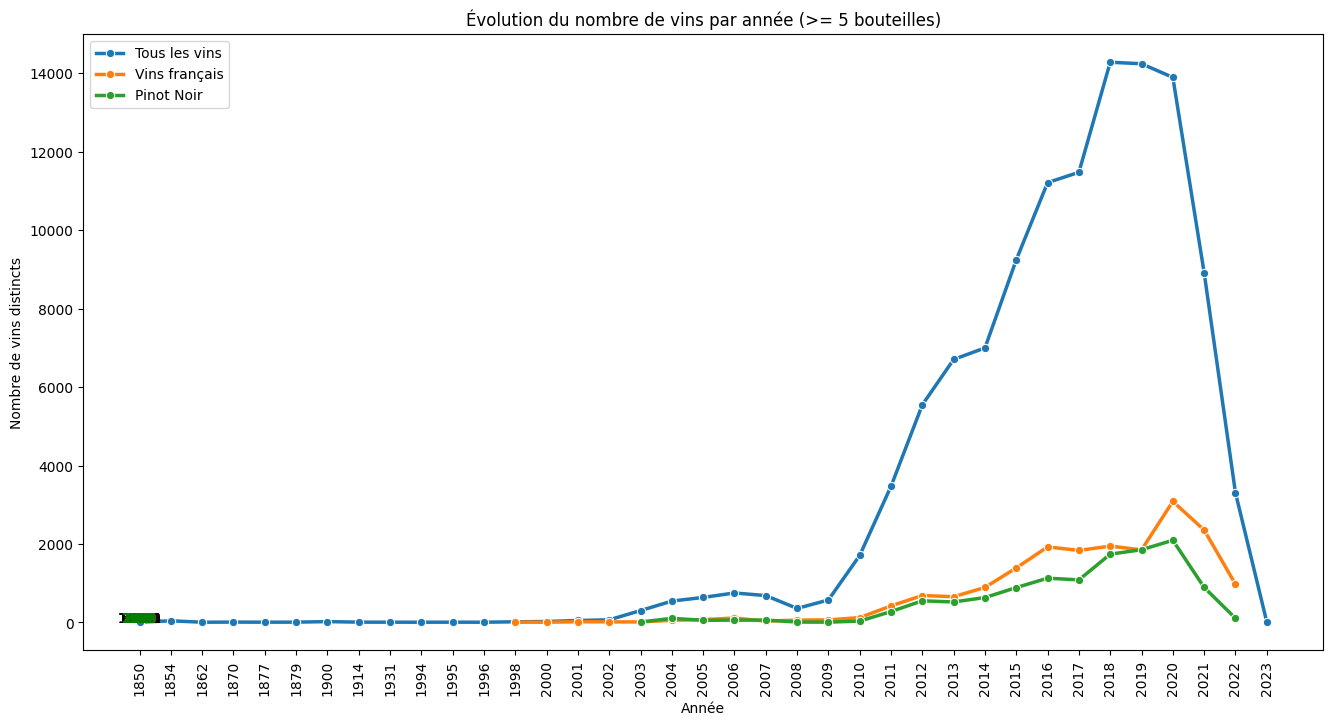

In [366]:
wine_per_year = wine_data.groupby('millesime')['title'].nunique().reset_index()
wine_per_year.columns = ['Année', 'Nombre de vins']
wine_per_year = wine_per_year[wine_per_year['Nombre de vins'] >= 5]
wine_per_year = wine_per_year.sort_values('Année')

pinot_noir_data = wine_data[wine_data['variety'] == "Pinot Noir"]
pinot_noir_year = pinot_noir_data.groupby('millesime')['title'].nunique().reset_index()
pinot_noir_year.columns = ['Année', 'Nombre de vins Pinot Noir']
pinot_noir_year = pinot_noir_year[pinot_noir_year['Nombre de vins Pinot Noir'] >= 5]
pinot_noir_year = pinot_noir_year.sort_values('Année')

france_data = wine_data[wine_data['country'] == "France"]
france_year = france_data.groupby('millesime')['title'].nunique().reset_index()
france_year.columns = ['Année', 'Nombre de vins français']
france_year = france_year[france_year['Nombre de vins français'] >= 5]
france_year = france_year.sort_values('Année')


plt.figure(figsize=(16, 8))
ax = sns.lineplot(data=wine_per_year, x='Année', y='Nombre de vins', marker='o', linewidth=2.5, label='Tous les vins')
sns.lineplot(france_year, x='Année', y='Nombre de vins français', marker='o', linewidth=2.5, label='Vins français')
sns.lineplot(data=pinot_noir_year, x='Année', y='Nombre de vins Pinot Noir', marker='o', linewidth=2.5, label='Pinot Noir')


for i, row in wine_per_year.iterrows():
    ax.annotate(row['Nombre de vins'], (row['Année'], row['Nombre de vins']),
                xytext=(0, 10), ha='center', fontsize=10, color='black')

for i, row in pinot_noir_year.iterrows():
    ax.annotate(row['Nombre de vins Pinot Noir'], (row['Année'], row['Nombre de vins Pinot Noir']),
                xytext=(0, 10), ha='center', fontsize=10, color='red')

for i, row in france_year.iterrows():
    ax.annotate(row['Nombre de vins français'], (row['Année'], row['Nombre de vins français']),
                xytext=(0, 10), ha='center', fontsize=10, color='green')


plt.xlabel("Année")
plt.ylabel("Nombre de vins distincts")
plt.title("Évolution du nombre de vins par année (>= 5 bouteilles)")
plt.xticks(rotation=90)
plt.show();

### Nombre de vins par pays

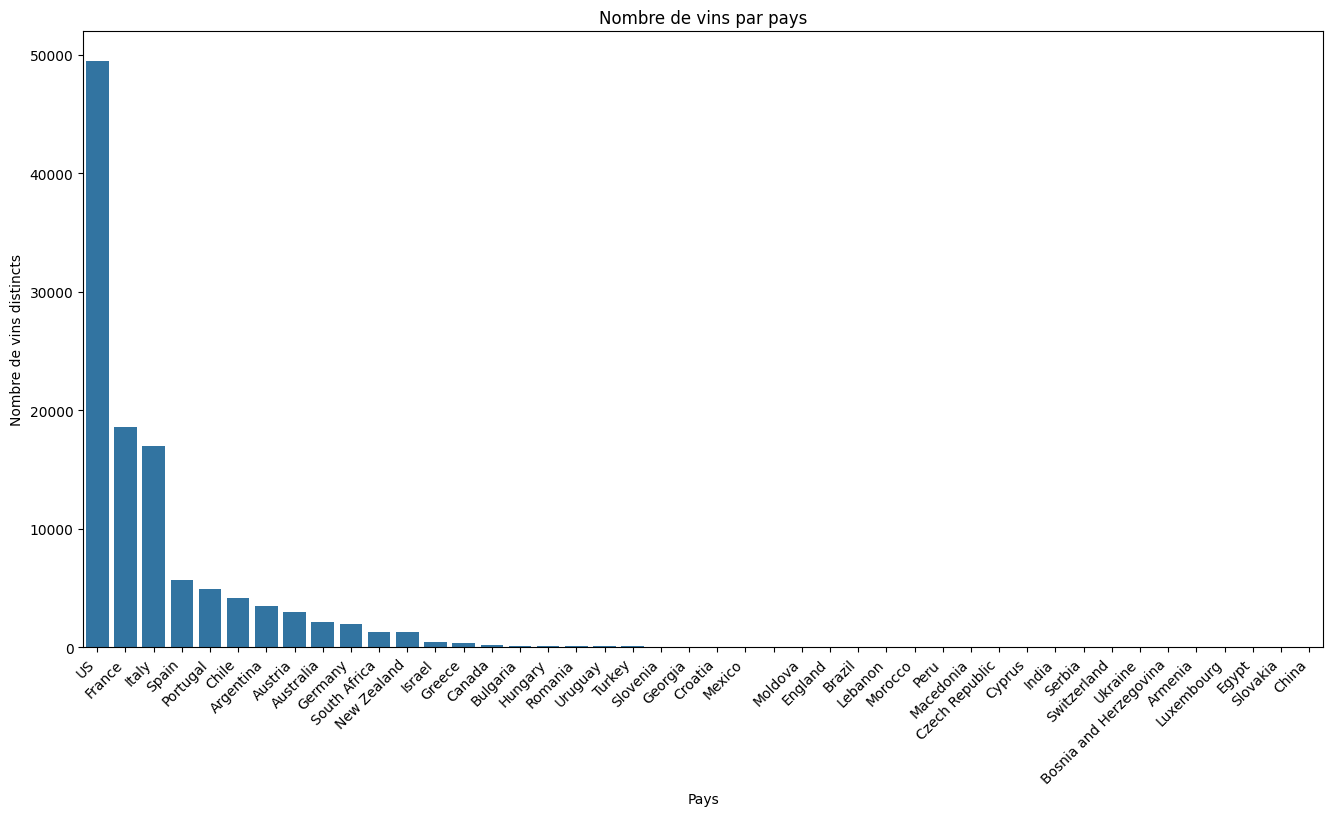

In [367]:
wine_data['country'] = wine_data['country'].replace({'elegant': 'Unknown', 'anti-Chardonnay': 'Unkown'})
wine_per_pays = wine_data.groupby('country')['title'].nunique().reset_index()
wine_per_pays.columns = ['Pays', 'Nombre de vins']
wine_pays = wine_per_pays[wine_per_pays['Nombre de vins'] > 100]

plt.figure(figsize=(16, 8))
sns.barplot(data=wine_per_pays, x='Pays', y='Nombre de vins', order=wine_per_pays.sort_values('Nombre de vins', ascending=False)['Pays'])
plt.xlabel("Pays")
plt.ylabel("Nombre de vins distincts")
plt.xticks(rotation=45, ha='right')
plt.title("Nombre de vins par pays")
plt.show();


### Nombre de vins par domaines

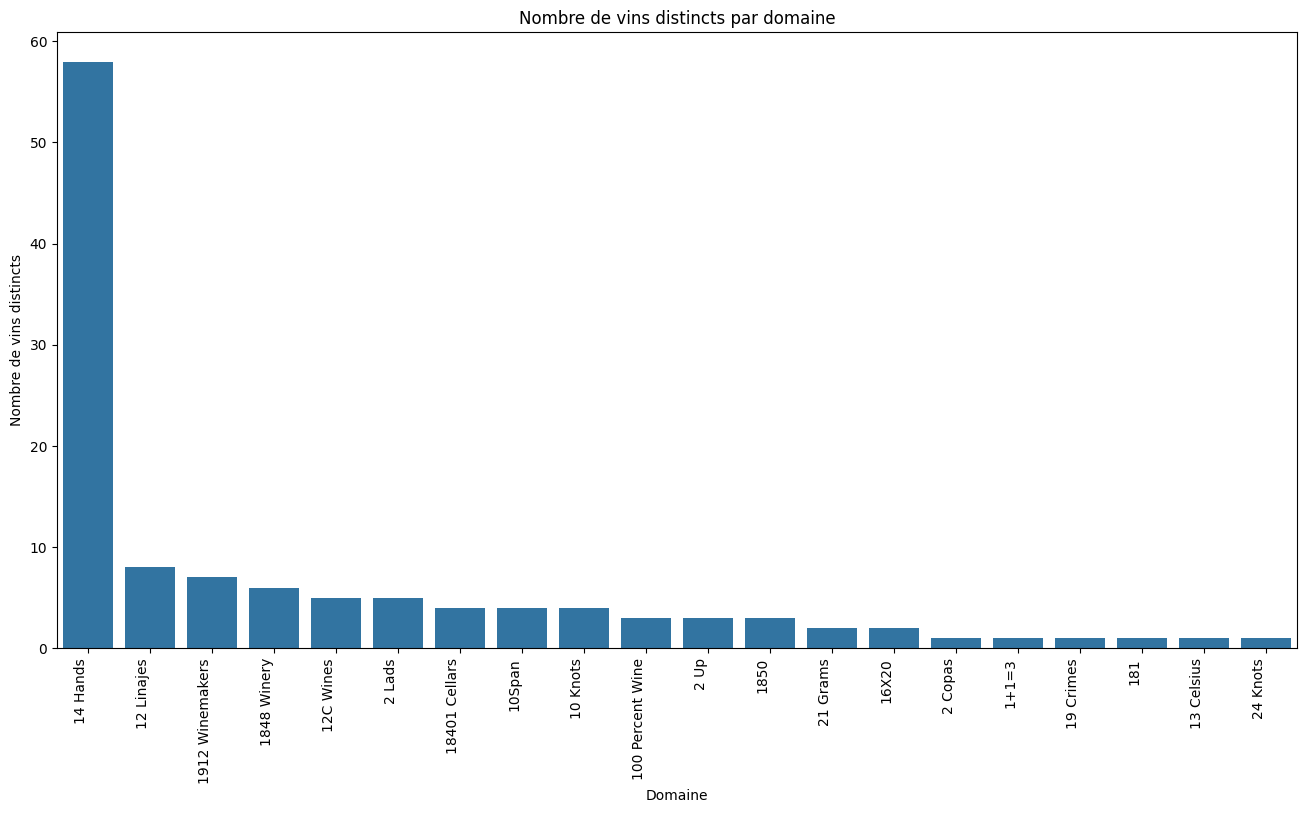

In [368]:
wine_counts = wine_data.groupby('winery')['title'].nunique().reset_index()
wine_counts.columns = ['Domaine', 'Nombre de vins']
wine_counts =wine_counts.head(20)

plt.figure(figsize=(16, 8))
sns.barplot(data=wine_counts, x='Domaine', y='Nombre de vins', order=wine_counts.sort_values('Nombre de vins', ascending=False)['Domaine'])
plt.xlabel("Domaine")
plt.ylabel("Nombre de vins distincts")
plt.xticks(rotation=90, ha='right')
plt.title("Nombre de vins distincts par domaine")
plt.show()

### Nombre de vin par domaines français

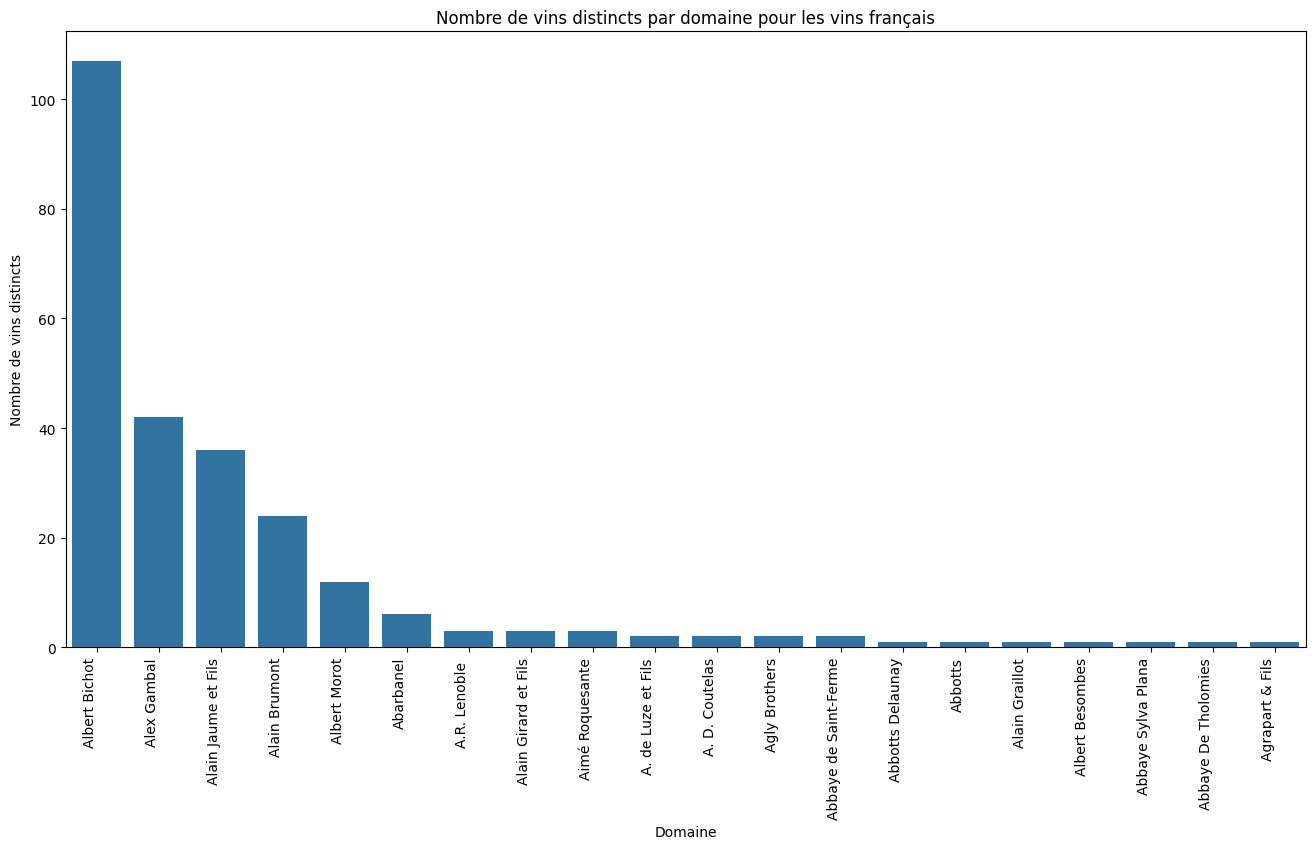

In [369]:
french_wine = wine_data[wine_data['country'] == 'France'].reset_index()
fwine_counts = french_wine.groupby('winery')['title'].nunique().reset_index()
fwine_counts.columns = ['Domaine', 'Nombre de vins']
fwine_counts =fwine_counts.head(20)

plt.figure(figsize=(16, 8))
sns.barplot(data=fwine_counts, x='Domaine', y='Nombre de vins', order=fwine_counts.sort_values('Nombre de vins', ascending=False)['Domaine'])
plt.xlabel("Domaine")
plt.ylabel("Nombre de vins distincts")
plt.xticks(rotation=90, ha='right')
plt.title("Nombre de vins distincts par domaine pour les vins français")
plt.show()

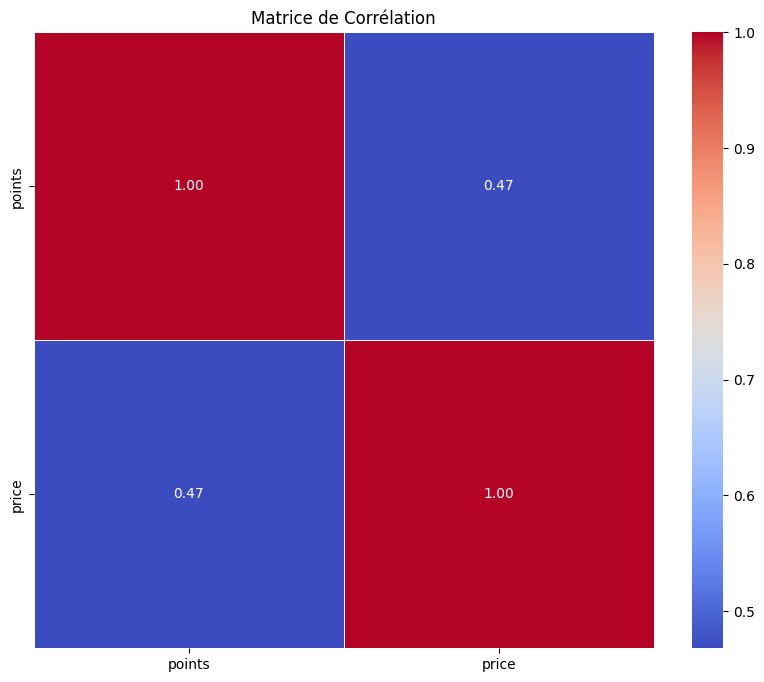

In [370]:
matrice_corr = wine_data.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show();

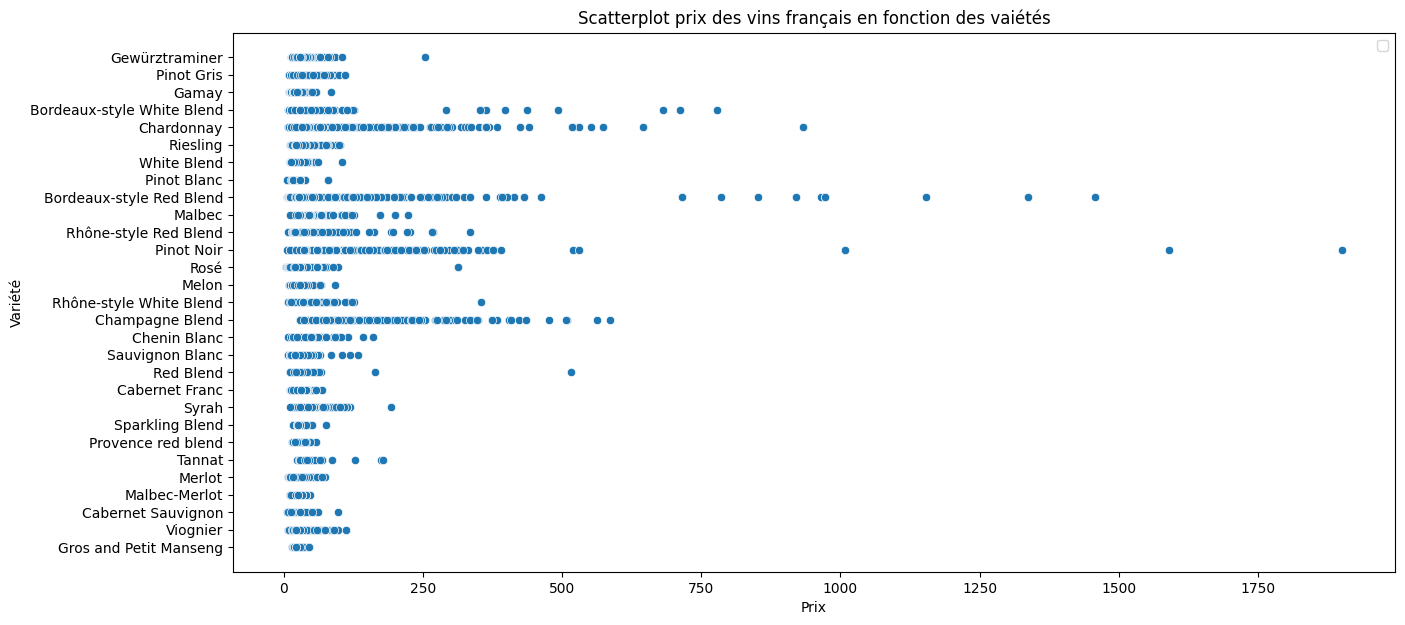

In [371]:
france_wine = wine_data[wine_data['country'] == 'France'].reset_index()
vins_majeures = france_wine['variety'].value_counts()
vins_majeures = vins_majeures[vins_majeures > 50].index
dff_filtre = france_wine[france_wine['variety'].isin(vins_majeures)]


plt.subplots(figsize = (15, 7))
sns.scatterplot(x = 'price', y = 'variety', data = dff_filtre)

plt.title("Scatterplot prix des vins français en fonction des vaiétés")
plt.legend(loc = 'upper right')
plt.xlabel("Prix", size = 10)
plt.ylabel("Variété", size = 10)

plt.show();

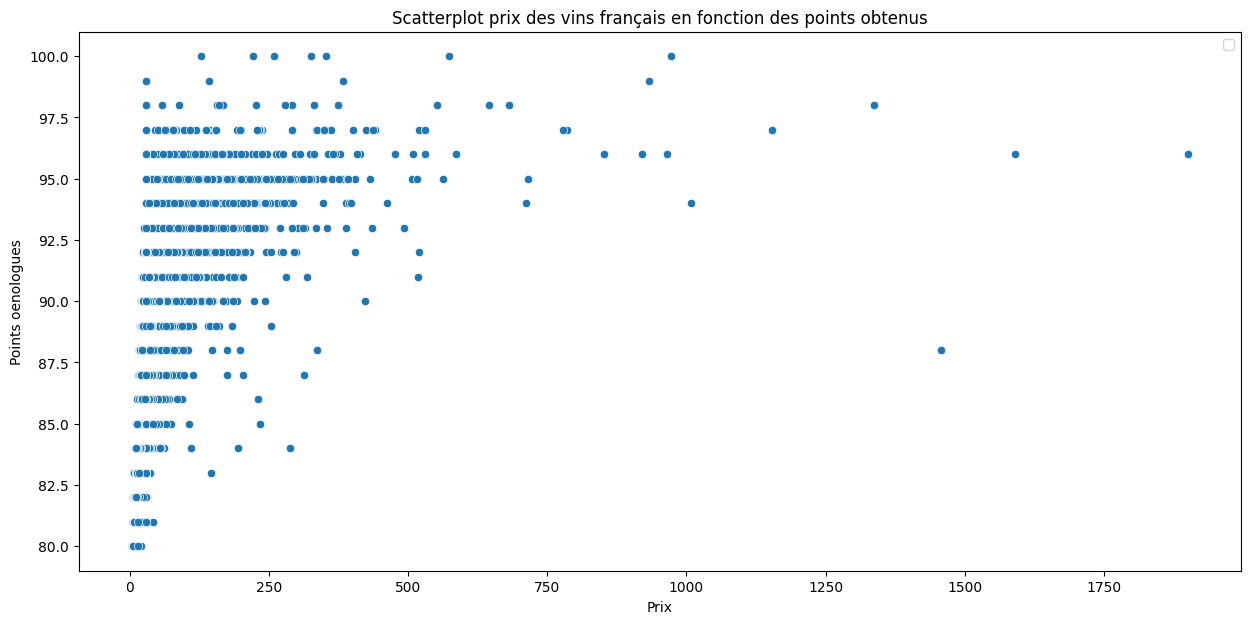

In [372]:
plt.subplots(figsize = (15, 7))
sns.scatterplot(x = 'price', y = 'points', data = france_wine)

plt.title("Scatterplot prix des vins français en fonction des points obtenus")
plt.legend(loc = 'upper right')
plt.xlabel("Prix", size = 10)
plt.ylabel("Points oenologues", size = 10)

plt.show();

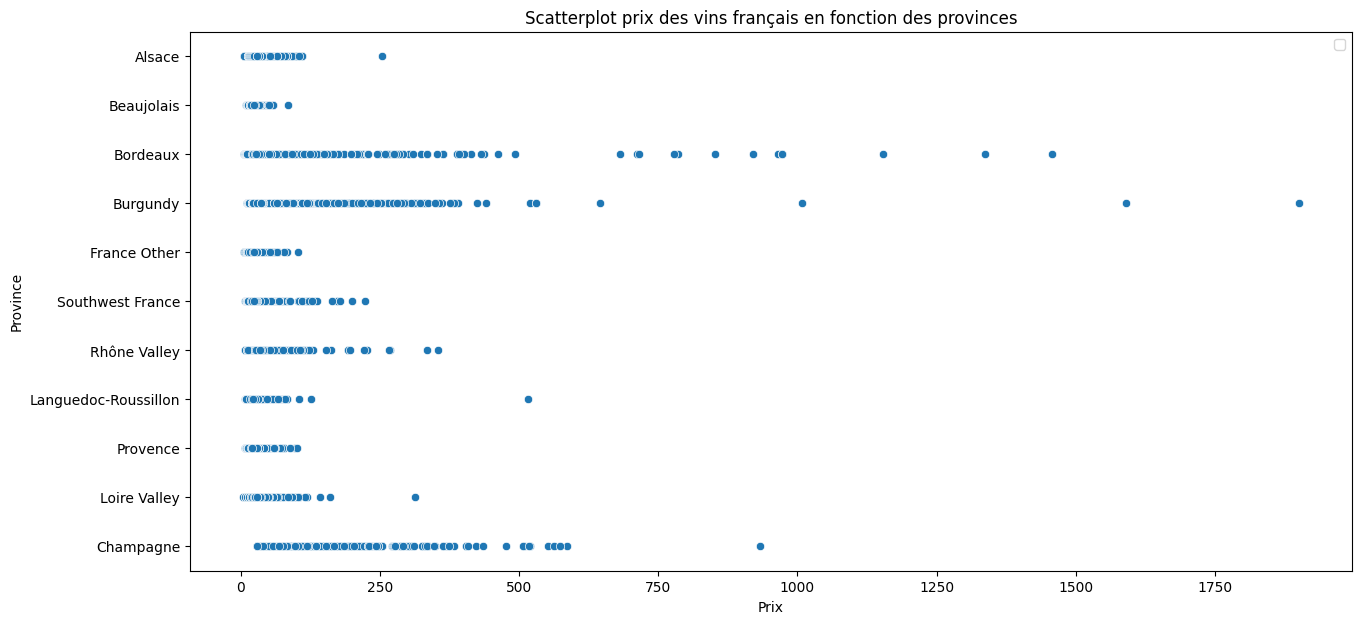

In [373]:
plt.subplots(figsize = (15, 7))
sns.scatterplot(x = 'price', y = 'province', data = france_wine)

plt.title("Scatterplot prix des vins français en fonction des provinces")
plt.legend(loc = 'upper right')
plt.xlabel("Prix", size = 10)
plt.ylabel("Province", size = 10)

plt.show();

# Prédiction du prix du Pinot Noir: Machine Learning

In [374]:
# données uniquement sur le pinot noir
pinot_noir = wine_data[(wine_data["variety"] == "Pinot Noir")]


In [375]:
pinot_noir.isnull().sum()

,0
country,0
description,0
designation,3361
points,0
price,0
province,0
region_1,0
region_2,0
taster_name,0
taster_twitter_handle,3158


In [376]:
pinot_noir.shape

(13112, 16)

In [377]:
pinot_noir.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery', 'millesime', 'points_class', 'price_class'],
      dtype='object')

In [378]:
# sélection des variables
X1 = pinot_noir[["country", "province", "taster_name", "points", "region_1", "millesime", "description"]]
y1 = pinot_noir['price']

In [379]:
# encodage des variables catégoriques et numériques
categorical_variables = ["country", "province", "region_1", "taster_name"]
numeric_variables = ["points", "millesime"]
text_variables = ["description"]

categorical_encoded = OneHotEncoder(handle_unknown="ignore")
numeric_scaled = StandardScaler()
text_transformer = TfidfVectorizer(stop_words="english", max_features=100)


In [380]:
from sklearn.compose import ColumnTransformer # appliquer différents prétraitements à différents sous-ensembles de colonnes de manière organisée
preprocessor = ColumnTransformer( # créer une instance de columntransformer qui est une liste du tuples où chaque tuple est une transformation, en l'assignant à une variable
    transformers=[ # liste de tuple
        ("num", numeric_scaled, numeric_variables), # descriptif de la transformation, variables transformées, variables_brutes
        ("cat", categorical_encoded, categorical_variables),
        ("txt", text_transformer, text_variables[0])
    ]
)

In [381]:
from sklearn.pipeline import Pipeline # séquence d'étapes de transformation et de modélisation des données (avant: automatisation, reproductibilité, organisation, et simplification)
# le modèle : on choisit de prime à bord un modèle robuste
rf_model = Pipeline([
    ("preprocessor", preprocessor), # étape 1 pipeline, transformation
    ("regressor", RandomForestRegressor(n_estimators=200, max_depth=7, min_samples_leaf=5, random_state=42)) # étape 2 pipeline, entrainement
])


In [382]:
# séparation des données
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [383]:
# entraînement du modèle
rf_model.fit(X1_train, y1_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['points', 'millesime']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['country', 'province',
                                                   'region_1', 'taster_name']),
                                                 ('txt',
                                                  TfidfVectorizer(max_features=100,
                                                                  stop_words='english'),
                                                  'description')])),
                ('regressor',
                 RandomForestRegressor(max_depth=7, min_samples_leaf=5,
                                       n_estimators=200, random_state=42))])

In [384]:
print("Score d'entrainement:", rf_model.score(X1_train, y1_train))
print("Score de test:", rf_model.score(X1_test, y1_test))

Score d'entrainement: 0.5272016152583975
Score de test: 0.5797523095376906


In [385]:
predictions = rf_model.predict(X1_test)
mae = mean_absolute_error(y1_test, predictions)
print(f"MAE: {mae:.2f} $")

MAE: 8.37 $


In [386]:
# prédiction pour le Pinot Noir du Domaine des Croix
pinot_domaine = pd.DataFrame({
    "country": ["France"],
    "province": ["Burgundy"],
    "region_1": ["Corton Grèves"],
    "taster_name": ["Roger Voss"],
    "points": [94],
    "millesime": [2016],
    "description": ["Firm and solid with great swathes of black fruit."]
})

predicted_price1 = rf_model.predict(pinot_domaine)
print(f"Prix prédit pour le Pinot Noir du Domaine des Croix : {predicted_price1[0]:.2f} $")


Prix prédit pour le Pinot Noir du Domaine des Croix : 98.84 $


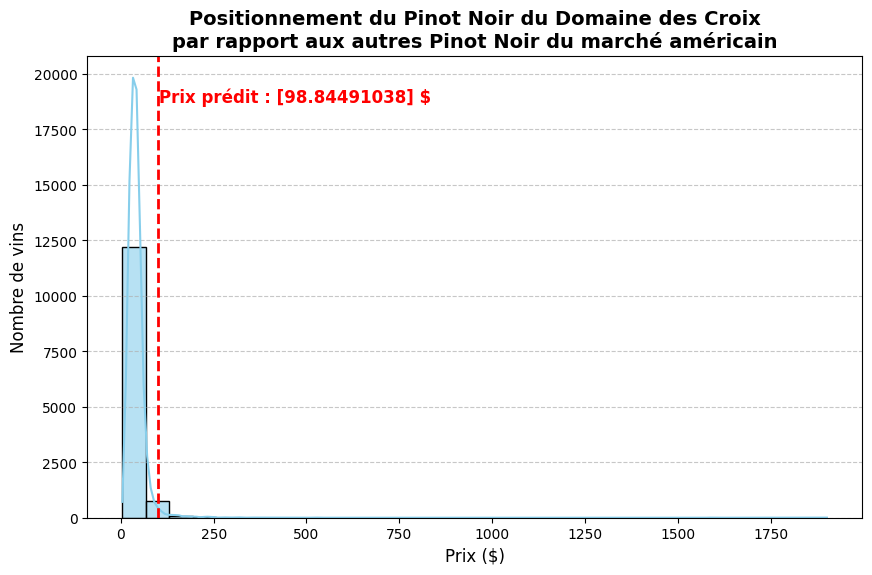

In [387]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création du graphique
plt.figure(figsize=(10, 6))
sns.histplot(pinot_noir["price"], bins=30, kde=True, color="skyblue", alpha=0.6)

# Ajout d'une ligne pour le prix prédit
plt.axvline(predicted_price1, color="red", linestyle="dashed", linewidth=2)
plt.text(predicted_price1 + 5, plt.ylim()[1] * 0.9, f"Prix prédit : {predicted_price1} $",
         color="red", fontsize=12, ha="left", fontweight="bold")

# Personnalisation
plt.title("Positionnement du Pinot Noir du Domaine des Croix\npar rapport aux autres Pinot Noir du marché américain", fontsize=14, fontweight="bold")
plt.xlabel("Prix ($)", fontsize=12)
plt.ylabel("Nombre de vins", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Affichage
plt.show()


# NLP - Analyse sémantique

In [392]:
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
nlp = spacy.load("en_core_web_sm")


def process_text(text):
    doc = nlp(text)
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
    return lemmas


wine_data['lemmas'] = wine_data['description'].fillna('').apply(process_text)

# Compter la fréquence des lemmes
all_lemmas = [lemma for sublist in wine_data['lemmas'] for lemma in sublist]
lemma_counts = Counter(all_lemmas)

#### WordCloud marché américain des vins

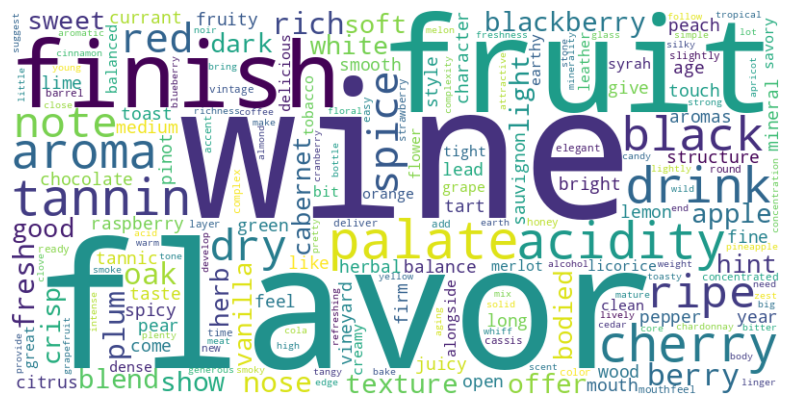

In [393]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(lemma_counts)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#### WordCloud vins français sur le marché américain

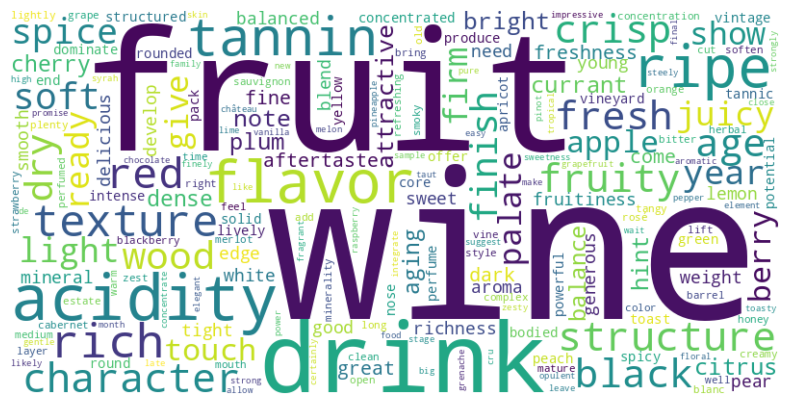

In [394]:
france = wine_data[wine_data['country'] == 'France']
france_lemmas = [lemma for sublist in france['lemmas'] for lemma in sublist]
france_lemma_counts = Counter(france_lemmas)
wordcloud_france = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(france_lemma_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_france, interpolation='bilinear')
plt.axis('off')
plt.show()

#### WordCloud pinots noirs sur américain des vins

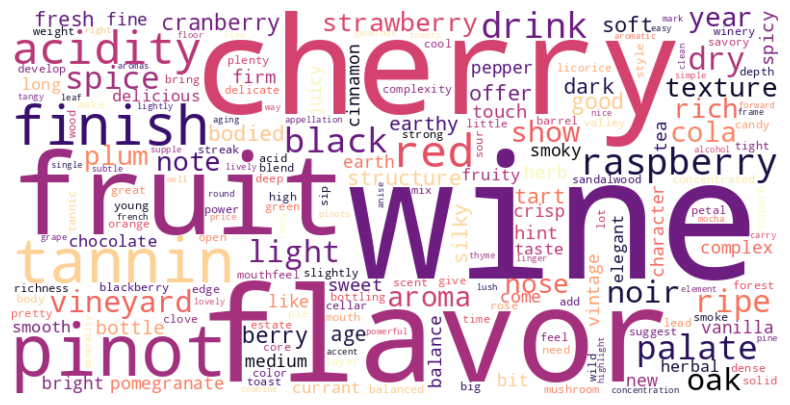

In [395]:
pinot_noir = wine_data[wine_data['variety'].fillna('') == 'Pinot Noir']
pinot_noir_lemmas = [lemma for sublist in pinot_noir['lemmas'] for lemma in sublist]
pinot_noir_lemma_counts = Counter(pinot_noir_lemmas)
wordcloud_pinot_noir = WordCloud(width=800, height=400, background_color='white', colormap="magma").generate_from_frequencies(pinot_noir_lemma_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pinot_noir, interpolation='bilinear')
plt.axis('off')
plt.show()